<a href="https://colab.research.google.com/github/Ivan8Garcia/challenge-data-science/blob/main/CHALLENGE_TELECOMX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EXTRACCION**

In [16]:
import pandas as pd

In [17]:
url="https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [18]:
datos= pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [19]:
columnas= list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [20]:
datos_normalizado = pd.json_normalize(datos)
datos_normalizado

""
0
1
2
3
4
5


In [21]:
# Re-load the data as a list of dictionaries
import requests
import json

response = requests.get(url)
data_list = json.loads(response.text)

datos_normalizado = pd.json_normalize(data_list,
                                      # Specify keys from the top level or nested structures
                                      meta=['customerID', 'Churn',
                                            ['customer', 'gender'],
                                            ['customer', 'SeniorCitizen'],
                                            ['customer', 'Partner'],
                                            ['customer', 'Dependents'],
                                            ['customer', 'tenure'],
                                            ['phone', 'PhoneService'],
                                            ['phone', 'MultipleLines'],
                                            ['internet', 'InternetService'],
                                            ['internet', 'OnlineSecurity'],
                                            ['internet', 'OnlineBackup'],
                                            ['internet', 'DeviceProtection'],
                                            ['internet', 'TechSupport'],
                                            ['internet', 'StreamingTV'],
                                            ['internet', 'StreamingMovies'],
                                            ['account', 'Contract'],
                                            ['account', 'PaperlessBilling'],
                                            ['account', 'PaymentMethod'],
                                            ['account', 'MonthlyCharges'],
                                            ['account', 'TotalCharges']
                                           ])


print(datos_normalizado.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [22]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#**TRANSFORMACION**

In [23]:
import numpy as np

In [24]:
# prompt: Ahora que ya has extraído y realizado el análisis inicial de los datos, es momento de asegurarte de que estén limpios y listos para las siguientes etapas.
# En esta fase, el objetivo es identificar y corregir inconsistencias que podrían afectar tanto el análisis como, más adelante, la creación de modelos predictivos.
#  Qué debes revisar:,
# Valores ausentes (missing values),
# Datos duplicados,
# Errores de formato (por ejemplo, fechas con formatos distintos, números guardados como texto),
# Categorías inconsistentes (como "Sí", "si", "SÍ", "Yes", etc.),
# Estos pequeños errores pueden generar resultados engañosos en los análisis y modelos. ¡Limpia tus datos con cuidado!
#  Algunas funciones útiles de Pandas:,
# pandas.unique: para ver los valores únicos de una columna categórica e identificar inconsistencias.,
# Series.dt.normalize: para normalizar fechas, eliminando información de hora cuando no es necesaria.,

# Verificar valores ausentes
print("\nValores ausentes por columna:")
print(datos_normalizado.isnull().sum())

# Verificar datos duplicados
print("\nNúmero de filas duplicadas:", datos_normalizado.duplicated().sum())

# Eliminar duplicados si existen
datos_normalizado.drop_duplicates(inplace=True)
print("Duplicados eliminados. Nuevo número de filas:", len(datos_normalizado))

# Identificar columnas categóricas para revisar inconsistencias
categorical_cols = datos_normalizado.select_dtypes(include='object').columns
print("\nValores únicos en columnas categóricas para identificar inconsistencias:")
for col in categorical_cols:
  print(f"\nColumna: {col}")
  print(datos_normalizado[col].unique())
  # Ejemplo de corrección de categorías inconsistentes (ajustar según sea necesario)
  # if col == 'gender':
  #   datos_normalizado[col] = datos_normalizado[col].replace({'Male': 'Male', 'Female': 'Female'}) # Ejemplo, ajustar a los valores encontrados

# Convertir 'TotalCharges' a float, manejando posibles errores
# Se usa errors='coerce' para convertir valores no numéricos a NaN
datos_normalizado['account.Charges.Total'] = pd.to_numeric(datos_normalizado['account.Charges.Total'], errors='coerce')

# Después de convertir 'TotalCharges' a float, verificar si hay nuevos NaNs
print("\nValores ausentes después de convertir 'TotalCharges':")
datos_normalizado.isnull().sum()

# Revisar si hay columnas de fecha que necesiten normalización (no parece haber en este dataset, pero es un ejemplo)
# Si hubiera una columna de fecha 'FechaRegistro', por ejemplo:
# datos_normalizado['FechaRegistro'] = pd.to_datetime(datos_normalizado['FechaRegistro'], errors='coerce')
# datos_normalizado['FechaRegistro'] = datos_normalizado['FechaRegistro'].dt.normalize()

# Información final del DataFrame limpio (o con los pasos de limpieza aplicados)
print("\nInformación del DataFrame después de la limpieza inicial:")
datos_normalizado.info()

# Mostrar las primeras filas para verificar
print("\nPrimeras filas del DataFrame después de la limpieza inicial:")
print(datos_normalizado.head())


Valores ausentes por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

Número de filas duplicadas: 0
Duplicados eliminados. Nuevo número de filas: 7267

Valores únicos en columnas categóricas para identificar inconsistencias:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: c

In [25]:
datos_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [26]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [27]:
# prompt: En esta etapa del desafío TelecomX, todavía estamos enfocados en el análisis exploratorio y descriptivo de los datos, por lo que puedes dejar las columnas "yes/no" como variables categóricas si vas a analizarlas por frecuencias, proporciones o visualizar sus relaciones con otras variables.
# Sin embargo, te adelanto que más adelante vamos a construir modelos predictivos. Para eso, generalmente es útil convertir esas columnas "yes/no" en valores booleanos (True/False o 1/0), ya que muchos algoritmos de machine learning requieren variables numéricas para poder procesarlas.
# Entonces, una buena estrategia es:
# Durante el análisis exploratorio, puedes trabajar con ellas como categóricas si eso te resulta más claro para interpretar los datos.,
# Pero al preparar los datos para modelado (más adelante), será importante transformarlas a formato numérico, como booleano o binario.,
# Si prefieres, ya puedes hacer esa transformación desde ahora (por ejemplo, reemplazar "Yes" por 1 y "No" por 0), y seguir trabajando normalmente. Solo asegúrate de documentar lo que hiciste para no perder el rastro de los cambios

# Mapear 'Yes' a 1 y 'No' a 0 en las columnas relevantes
# Identificar las columnas que contienen 'Yes'/'No'.
# Basado en la estructura de los datos y nombres de columnas:
cols_to_map = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.MultipleLines', # Esta podría tener 'No phone service' también, mapearemos 'Yes'/'No' y dejaremos el resto.
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.PaperlessBilling'
]

for col in cols_to_map:
    # Usar replace para manejar solo 'Yes' y 'No', manteniendo otros valores si existen (como 'No phone service')
    datos_normalizado[col] = datos_normalizado[col].replace({'Yes': 1, 'No': 0})

# Para la columna 'customer.SeniorCitizen', parece ser 0/1 directamente, pero si tuviera 'Yes'/'No', se aplicaría el mismo mapeo.
# Vamos a verificar sus valores únicos por si acaso
print("\nValores únicos en 'customer.SeniorCitizen' después de la posible transformación:")
print(datos_normalizado['customer.SeniorCitizen'].unique())

# Verificar los cambios en las columnas mapeadas
print("\nPrimeras filas después de mapear 'Yes'/'No' a 1/0:")
print(datos_normalizado[cols_to_map].head())

# Información final para confirmar los tipos de datos
print("\nInformación del DataFrame después de mapear 'Yes'/'No':")
datos_normalizado.info()


Valores únicos en 'customer.SeniorCitizen' después de la posible transformación:
[0 1]

Primeras filas después de mapear 'Yes'/'No' a 1/0:
  Churn  customer.Partner  customer.Dependents phone.MultipleLines  \
0     0                 1                    1                   0   
1     0                 0                    0                   1   
2     1                 0                    0                   0   
3     1                 1                    0                   0   
4     1                 1                    0                   0   

  internet.OnlineSecurity internet.OnlineBackup internet.DeviceProtection  \
0                       0                     1                         0   
1                       0                     0                         0   
2                       0                     0                         1   
3                       0                     1                         1   
4                       0                     0       

<ipython-input-27-714dd80d3c4d>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_normalizado[col] = datos_normalizado[col].replace({'Yes': 1, 'No': 0})


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [29]:
# prompt: Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias"  y tradúcela en inglés. Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

# Crear la columna "Cuentas_Diarias" (Daily_Charges)
# Suponiendo que la facturación mensual es 'account.Charges.Monthly'
# Y que se divide entre 30 días para obtener un valor diario aproximado.
# Traducir a inglés según la instrucción.

# Ensure the column exists and is numeric
if 'account.Charges.Monthly' in datos_normalizado.columns:
  # Convert to numeric, handling potential errors
  datos_normalizado['account.Charges.Monthly'] = pd.to_numeric(datos_normalizado['account.Charges.Monthly'], errors='coerce')

  # Calculate Daily Charges
  # Check if the column is numeric before performing division
  if pd.api.types.is_numeric_dtype(datos_normalizado['account.Charges.Monthly']):
      datos_normalizado['Daily_Charges'] = datos_normalizado['account.Charges.Monthly'] / 30
  else:
      print("Error: 'account.Charges.Monthly' is not numeric. Cannot calculate 'Daily_Charges'.")
else:
  print("Error: 'account.Charges.Monthly' column not found.")


# Mostrar las primeras filas con la nueva columna para verificar
print("\nPrimeras filas del DataFrame con la nueva columna 'Daily_Charges':")
print(datos_normalizado[['account.Charges.Monthly', 'Daily_Charges']].head())

# Información final del DataFrame para ver la nueva columna y su tipo de dato
print("\nInformación del DataFrame después de agregar 'Daily_Charges':")
datos_normalizado.info()


Primeras filas del DataFrame con la nueva columna 'Daily_Charges':
   account.Charges.Monthly  Daily_Charges
0                     65.6       2.186667
1                     59.9       1.996667
2                     73.9       2.463333
3                     98.0       3.266667
4                     83.9       2.796667

Información del DataFrame después de agregar 'Daily_Charges':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   p

In [30]:
datos_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,Yes,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [28]:
#Pero los espacios en blanco siguen ahí. Podemos tomar esta serie de datos, usar de nuevo el str y reemplazar los espacios con guiones bajos:
#para reemplazar los espacios en blanco como en la palabra 0NE YEAR a ONE_YEAR
datos.columns.str.lower().str.replace(' ', '_')

#**CARGA Y ANALISIS**

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [35]:
datos_normalizado.describe()

,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,0.593230,64.720098,2280.634213,2.157337
std,0.369074,0.499782,0.458343,24.571773,0.491265,30.129572,2268.632997,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,0.000000,35.425000,400.225000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,1.000000,70.300000,1391.000000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,1.000000,89.875000,3785.300000,2.995833
max,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.


Distribución de Churn:
          Count  Proportion (%)
Churn                          
No Churn   5174       71.198569
Churn      1869       25.719004
NaN         224        3.082427


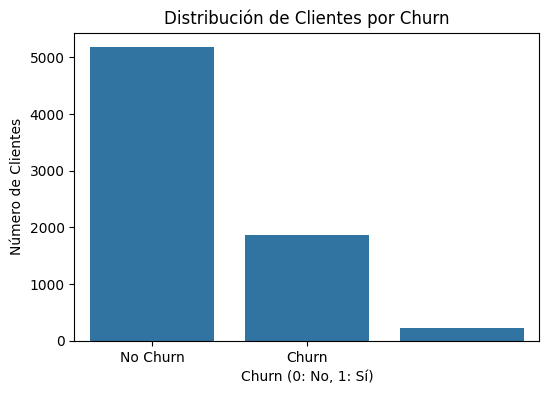

In [38]:
# prompt: En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la proporción de churn
churn_counts = datos_normalizado['Churn'].value_counts()
churn_proportions = datos_normalizado['Churn'].value_counts(normalize=True) * 100

# Crear un DataFrame para visualizar
churn_data = pd.DataFrame({'Count': churn_counts, 'Proportion (%)': churn_proportions})
churn_data.index = churn_data.index.map({0: 'No Churn', 1: 'Churn'}) # Mapear 0/1 a etiquetas

print("\nDistribución de Churn:")
print(churn_data)

# Gráfico de barras para las counts
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=datos_normalizado)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

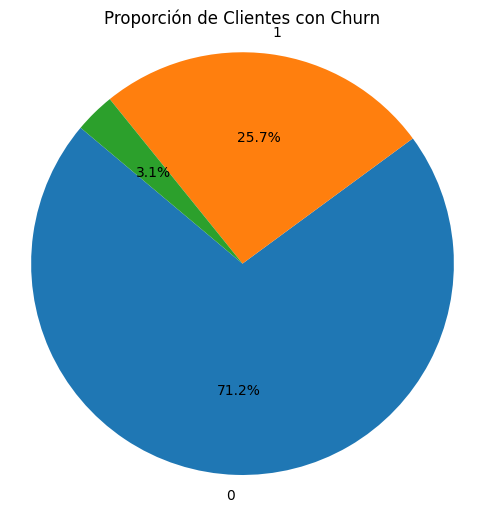

In [37]:
# Gráfico de pastel para las proporciones
plt.figure(figsize=(6, 6))
plt.pie(churn_proportions, labels=churn_proportions.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de Clientes con Churn')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#**INFORME FINAL**